In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## Mapping bike stations

In [40]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [41]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [42]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=150)

In [47]:
colors = stations.group('landmark').with_column(
    'color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

landmark,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [49]:
def find_color(city_name):
    return colors.where("landmark", are.equal_to(city_name)).column("color").item(0)

with_colors = stations.with_column("color", stations.apply(find_color, "landmark"))
with_colors.show(3)

station_id,name,lat,long,dockcount,landmark,installation,color
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013,purple
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013,purple
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013,purple


In [50]:
Marker.map_table(with_colors.select('lat', 'long', 'landmark', 'color'))

## Jury selection

In [53]:
population = 16000
proportion_black = .26
num_black = int(population*proportion_black)
num_nonblack = population - num_black
eligible = Table().with_columns(
    "Race", np.append(np.repeat("Black", num_black), np.repeat("Non-black", num_nonblack)))
eligible

Race
Black
Black
Black
Black
Black
Black
Black
Black
Black
Black


In [54]:
eligible.group("Race")

Race,count
Black,4160
Non-black,11840


In [62]:
def count_black_in_sample(sample_size):
    # Note that this is a fairly inefficient way of doing this.
    # For each sample we have to construct a whole table and group
    # it.  But it's good enough.
    return eligible.sample(sample_size, with_replacement=False).group(0).column("count").item(0)

In [69]:
def simulate_jury_pools(sample_size, num_simulations):
    sample_sizes = Table().with_columns(
        "Simulation #", np.arange(num_simulations),
        "Sample size", np.repeat(sample_size, num_simulations))
    samples = sample_sizes.with_columns(
        "Number black in sample",
        sample_sizes.apply(count_black_in_sample, "Sample size"))
    return samples

In [70]:
thousand_simulations = simulate_jury_pools(100, 1000)

In [71]:
thousand_simulations

Simulation #,Sample size,Number black in sample
0,100,29
1,100,28
2,100,19
3,100,28
4,100,21
5,100,25
6,100,20
7,100,23
8,100,21
9,100,25


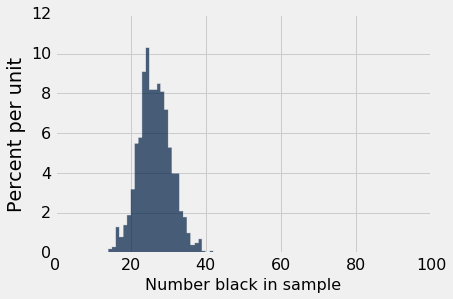

In [75]:
thousand_simulations.hist("Number black in sample", bins=np.arange(100+1))

In [76]:
thousand_simulations.where(1, are.below(10))

Simulation #,Sample size,Number black in sample


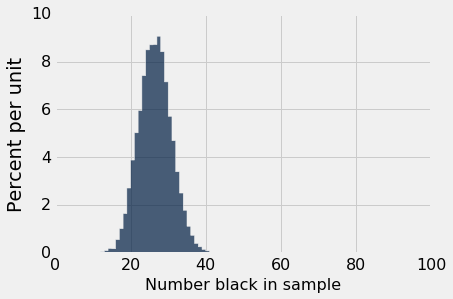

In [78]:
ten_thousand_simulations = simulate_jury_pools(100, 10000)
ten_thousand_simulations.hist("Number black in sample", bins=np.arange(100+1))

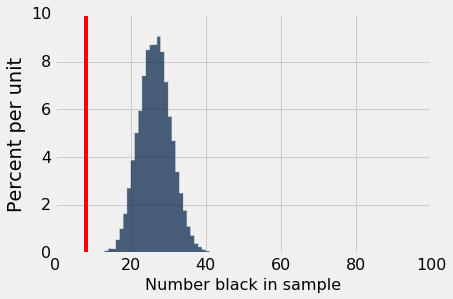

In [82]:
ten_thousand_simulations.hist("Number black in sample", bins=np.arange(100+1))
plots.axvline(8, color="red")

## Extras

In [2]:
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [37]:
# Step one: Compute average trip durations for each station.
duration_by_station = trips.select('Start Station', 'Duration')\
                           .group('Start Station', np.mean)\
                           .relabeled("Duration mean", "Average trip duration")

# Step two: Compute number of trips for each station.
starts = trips.group('Start Station')

# Step three: Write a function to look up counts in the starts
# table.
def find_trip_count(station_name):
    return starts.where("Start Station", are.equal_to(station_name)).column("count").item(0)

# Step four: Apply the function to each station in the
# table of average trip durations.
counts = duration_by_station.apply(find_trip_count, "Start Station")

# Step five: Add the resulting array to the table of
# average trip durations.
durations_and_counts = duration_by_station.with_column("Number of trips", counts)
durations_and_counts

Start Station,Average trip duration,Number of trips
2nd at Folsom,543.396,7999
Temporary Transbay Terminal (Howard at Beale),612.622,14436
Townsend at 7th,626.133,13752
San Francisco Caltrain 2 (330 Townsend),660.838,21758
2nd at South Park,691.807,9469
Howard at 2nd,697.077,6660
2nd at Townsend,719.057,14026
Beale at Market,736.002,8359
Broadway St at Battery St,787.533,7676
Embarcadero at Folsom,788.385,7596


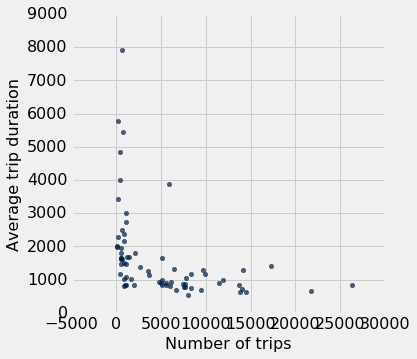

In [39]:
durations_and_counts.scatter(2, 1)

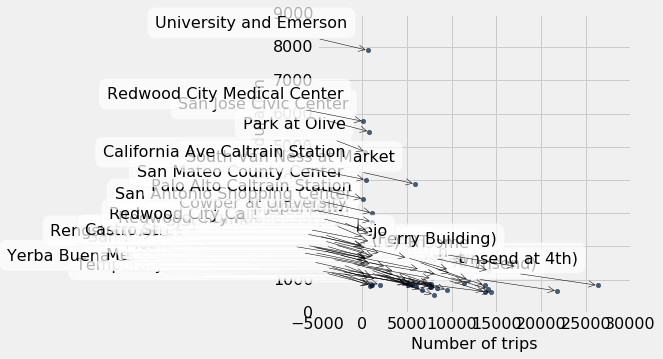

In [44]:
# Labels?
durations_and_counts.scatter("Number of trips", "Average trip duration", labels="Start Station")

In [51]:
def find_trip_count(station_name):
    return starts.where("Start Station", are.equal_to(station_name)).column("count").item(0)

stations_with_trip_data = stations.where("name", are.contained_in(starts.column("Start Station")))
count_by_station = stations_with_trip_data.with_column(
    "Number of trips",
    stations_with_trip_data.apply(find_trip_count, "name"))
count_by_station

station_id,name,lat,long,dockcount,landmark,installation,Number of trips
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013,4968
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013,774
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013,1958
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013,562
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013,1418
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013,856
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013,495
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013,885
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013,832
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013,1099


In [52]:
starts_map_data = count_by_station.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', count_by_station.column('Number of trips') * 1000
)
starts_map_data.show(3)
Circle.map_table(starts_map_data)

lat,long,name,color,area
37.3297,-121.902,San Jose Diridon Caltrain Station,blue,4968000
37.3307,-121.889,San Jose Civic Center,blue,774000
37.334,-121.895,Santa Clara at Almaden,blue,1958000


In [ ]:
Circle.map_table(station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', station_starts.column('count') * 1000
))

In [53]:
durations = trips.group("Start Station", np.mean)

def find_average_duration(station_name):
    return durations.where("Start Station", are.equal_to(station_name)).column("Duration mean").item(0)

with_duration = count_by_station.with_column(
    "Average trip duration",
    count_by_station.apply(find_average_duration, "name"))
with_duration.show(3)

station_id,name,lat,long,dockcount,landmark,installation,Number of trips,Average trip duration
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013,4968,884.375
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013,774,5458.04
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013,1958,850.924


In [54]:
def duration_to_color(average_duration):
    """Converts an average trip duration to a string describing a color.
    
    Longer durations will be closer to bright red, and shorter durations
    will be closer to black.
    
    Args:
      average_duration (float): The average trip duration for one
        station.
    
    Returns:
      (string): A string describing a color based on the given average
        trip duration.  The string is in 6-digit hexidecimal format,
        which is a common way to describe colors."""
    max_duration_color = 255
    color_bits = 8
    rescaled_duration = min(max_duration_color, int(256 * average_duration / 5000))
    red_amount = 2**(2*color_bits) * rescaled_duration
    color = '#{:06X}'.format(red_amount)
    return color

duration_map_data = with_duration.select('lat', 'long', 'name').with_columns(
    'color', with_duration.apply(duration_to_color, 'Average trip duration'),
    'area', with_duration.column('Number of trips') * 4000,
)
duration_map_data.show(3)
Circle.map_table(duration_map_data, fill_opacity=1)

lat,long,name,color,area
37.3297,-121.902,San Jose Diridon Caltrain Station,#2D0000,19872000
37.3307,-121.889,San Jose Civic Center,#FF0000,3096000
37.334,-121.895,Santa Clara at Almaden,#2B0000,7832000


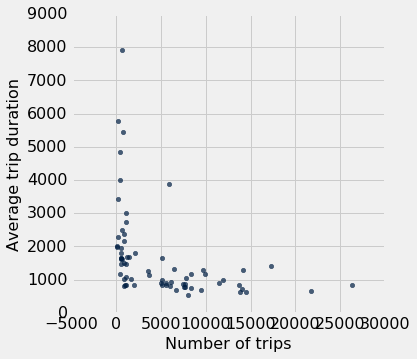

In [55]:
with_duration.scatter('Number of trips', 'Average trip duration')

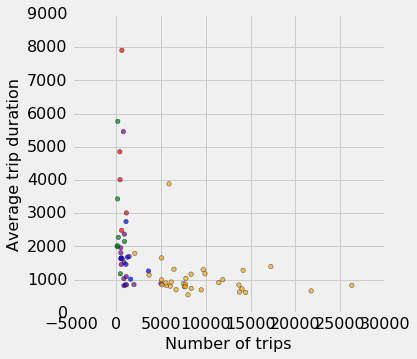

In [60]:
with_duration.scatter('Number of trips', 'Average trip duration', c=with_duration.apply(find_color, 'landmark'))

In [61]:
colors

landmark,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple
